In [32]:
import operator
import os

import joblib
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score, mean_absolute_error
from sklearn.preprocessing import StandardScaler

from tools.common_methods import get_train_test_data

In [33]:
X_train, X_test, y_train, y_test = get_train_test_data()
sc = StandardScaler()
X_train_std = sc.fit_transform(X_train)
X_test_std = sc.transform(X_test)

In [34]:
directory = '../saved_models'

r2_res = {}
mae_res = {}

for filename in os.scandir(directory):
    loaded_model = joblib.load(filename.path)
    name = filename.name
    if name == 'ridge.sav':
        test_data = X_test.drop(columns=['Середній пріоритет рекомендованих', 'Рекомендовано за співбесідою',
                                         'Регіональний коефіцієнт'])
    elif name.endswith('regressor.sav'):
        test_data = X_test_std
    elif name.__contains__('known'):
        best_features = ['Подано заяв на бюджет', 'Макс. обсяг держзамовлення', 'квота-1',
       'spec_full', 'uni_code', 'Орган управління', 'Суперобсяг']
        x_train_n_features = X_train.get(best_features)
        x_train_n_features_std = sc.fit_transform(x_train_n_features)
        x_test_n_features = X_test.get(best_features)
        test_data = sc.transform(x_test_n_features)
        name = 'xgb_regressor\n7_known_features.sav'
    else:
        test_data = X_test

    y_pred = loaded_model.predict(test_data)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    r2_res[name.split('.')[0]] = r2
    mae_res[name.split('.')[0]] = mae

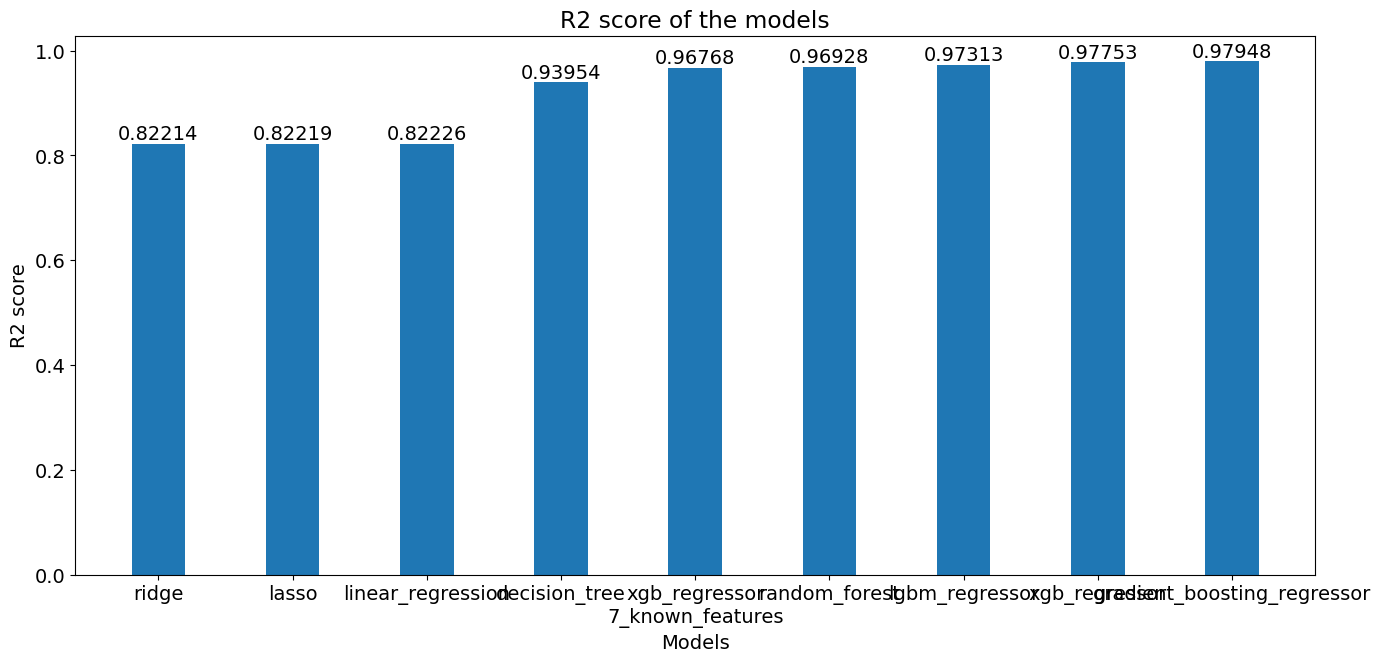

In [35]:
r2_res = dict(sorted(r2_res.items(), key=operator.itemgetter(1)))
models_r2 = list(r2_res.keys())
values_r2 = list(r2_res.values())

plt.rcParams.update({'font.size': 14})
fig = plt.figure(figsize=(16, 7))

cont = plt.bar(models_r2, values_r2, width=0.4)
plt.bar_label(cont, fmt='%.5f')
plt.xlabel("Models")
plt.ylabel("R2 score")
plt.title("R2 score of the models")
plt.show()

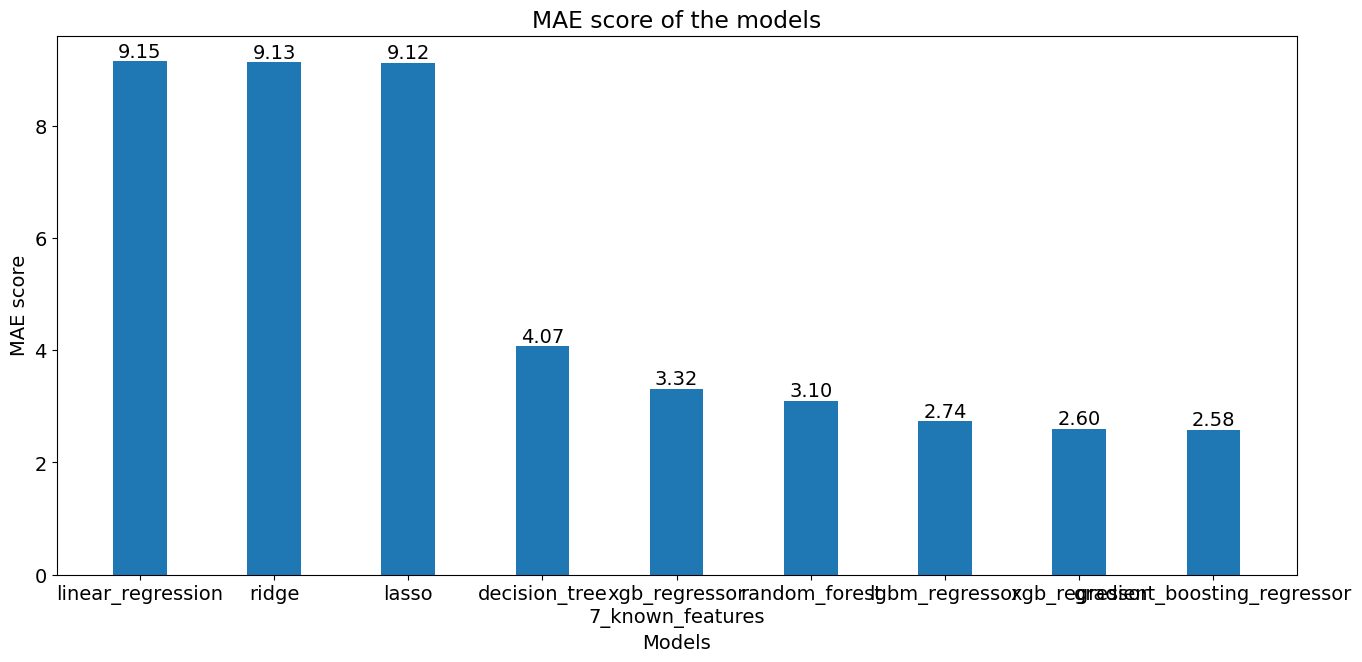

In [36]:
mae_res = dict(sorted(mae_res.items(), key=operator.itemgetter(1), reverse=True))
models_mae = list(mae_res.keys())
values_mae = list(mae_res.values())

fig = plt.figure(figsize=(16, 7))

cont = plt.bar(models_mae, values_mae, width=0.4)
plt.bar_label(cont, fmt='%.2f')
plt.xlabel("Models")
plt.ylabel("MAE score")
plt.title("MAE score of the models")
plt.show()

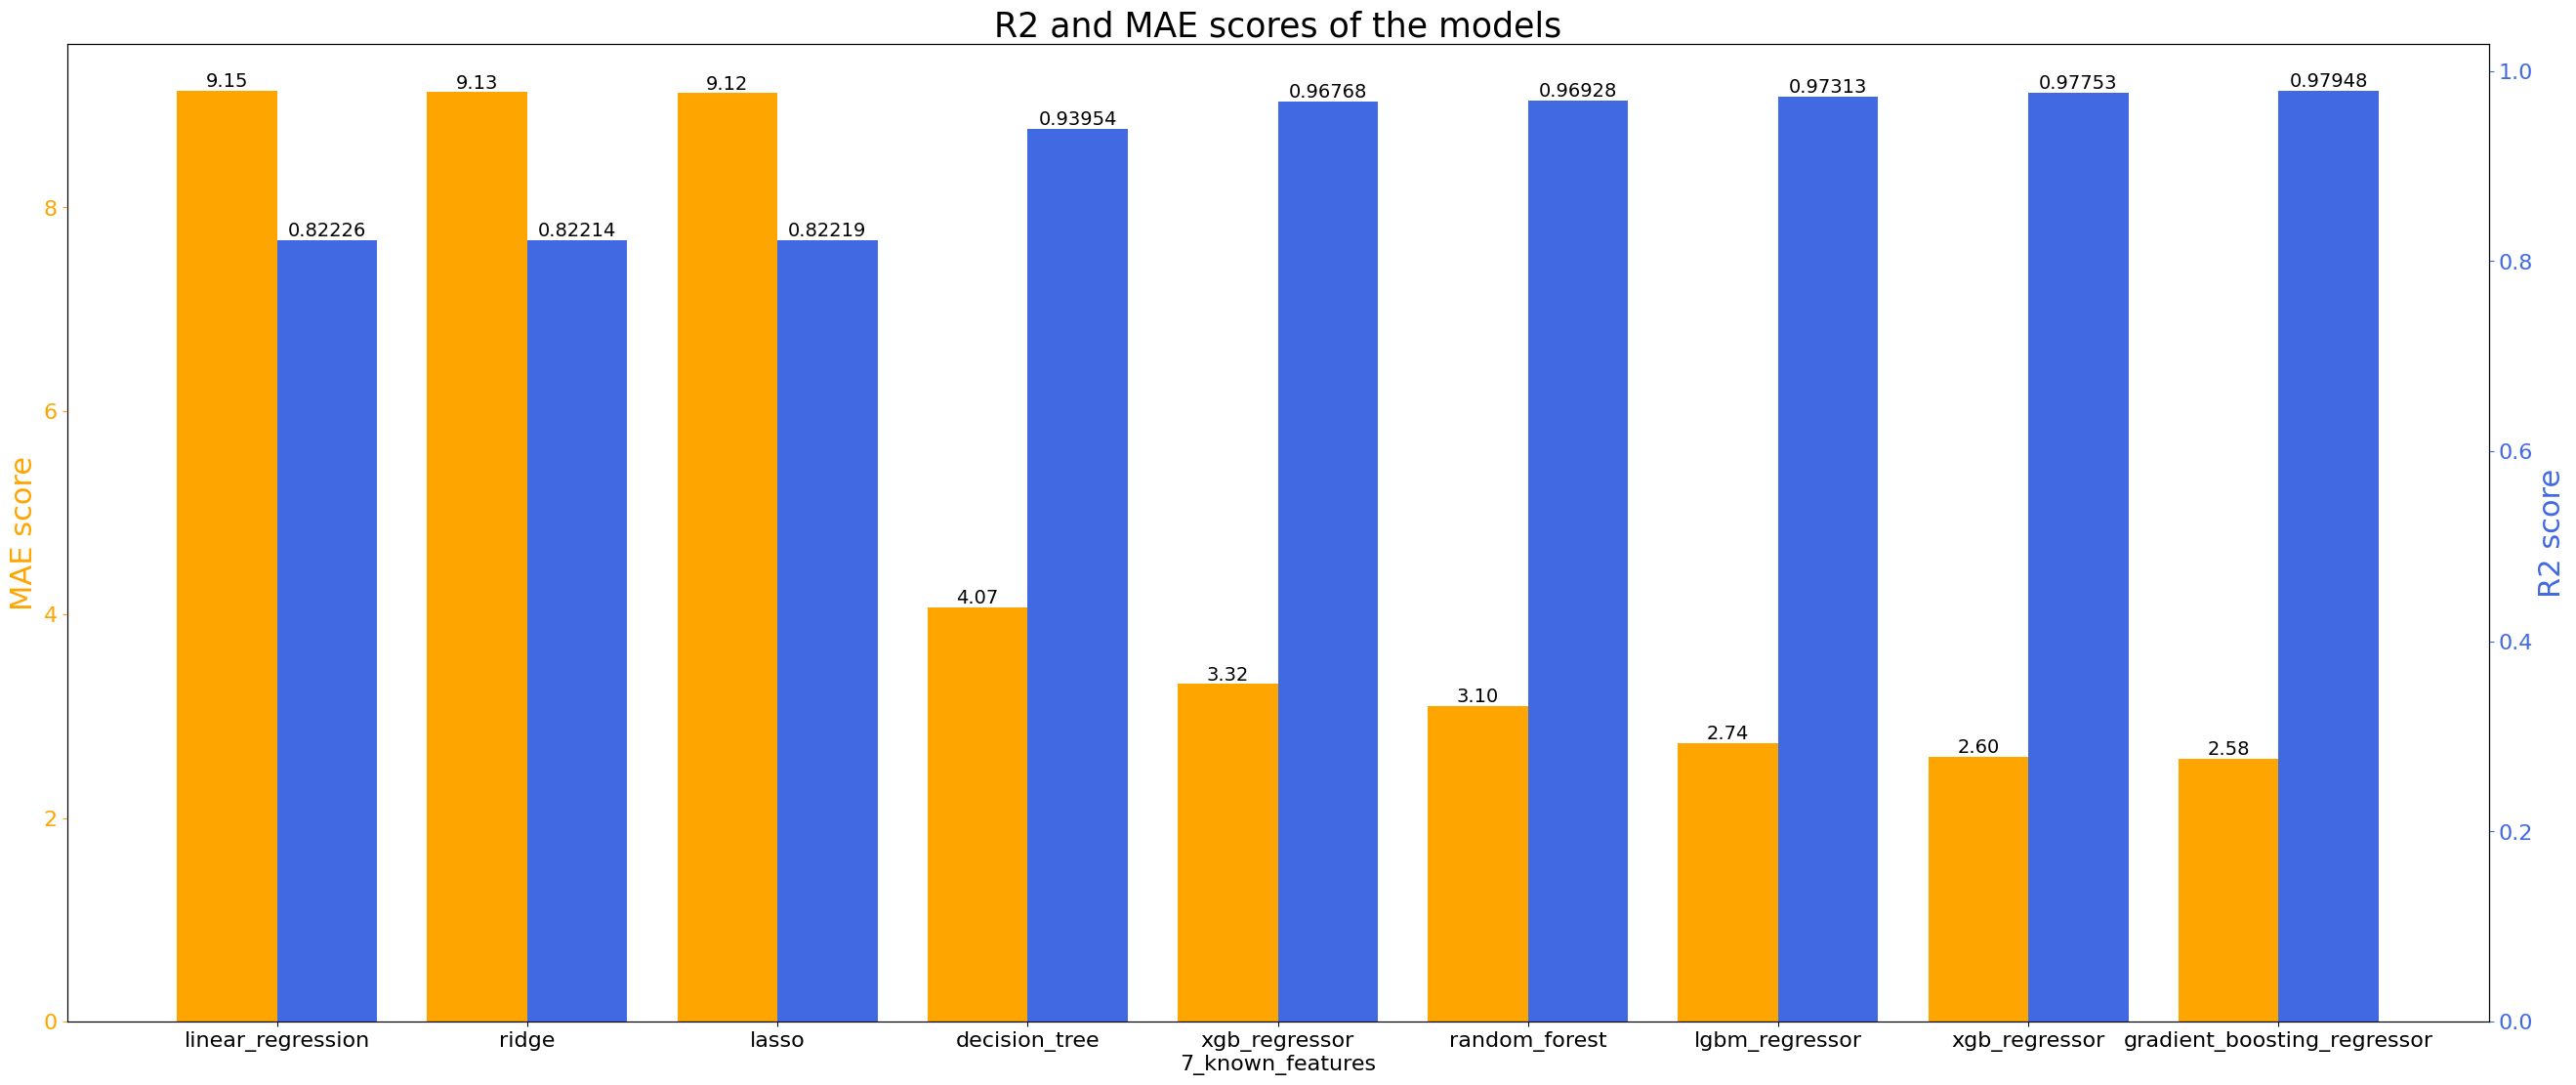

In [37]:
fig, ax = plt.subplots(figsize=(32, 13))
ax2 = ax.twinx()
ax.tick_params(labelsize=16)
ax2.tick_params(labelsize=16)

mae_color = 'orange'
cont = ax.bar(models_mae, values_mae, width=-0.4, align='edge', color=mae_color)
ax.bar_label(cont, fmt='%.2f')
ax.set_ylabel("MAE score", color=mae_color, fontsize=22)
ax.tick_params('y', colors=mae_color)

r2_color = 'royalblue'
cont2 = ax2.bar(models_r2, values_r2, width=0.4, align='edge', color=r2_color)
ax2.bar_label(cont2, fmt='%.5f')
ax2.set_ylabel("R2 score", color=r2_color, fontsize=22)
ax2.tick_params('y', colors=r2_color)

plt.title("R2 and MAE scores of the models", fontsize=25)
plt.savefig('r2_and_mae.png')
plt.show()